This code uses Pandas, numpy, scikit, and Tensorflow to form two clusters of books about two genres (Biobanking and Medical Synthesis) 

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap

C:\Users\its20\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Load the dataset

In [2]:
df = pd.read_csv('ML.csv')

Extract embeddings

In [3]:
X = np.array(df['_embeddings'].apply(eval).tolist())

Apply K-means clustering

In [4]:
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

Define category labels for each cluster

In [5]:
cluster_labels = {
    0: "Synthesis",
    1: "Biobanking"
}

Perform PCA for visualization

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

Visualize clusters with PCA

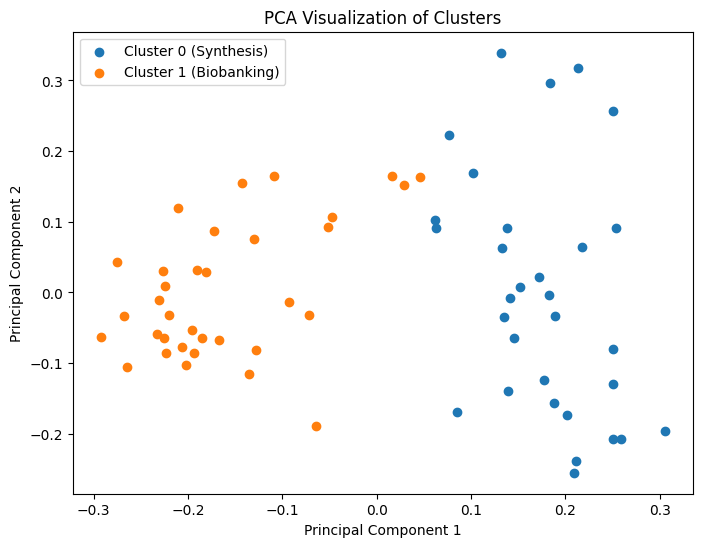

In [7]:
plt.figure(figsize=(8, 6))
for cluster_label in range(num_clusters):
    cluster_indices = df[df['cluster'] == cluster_label].index
    plt.scatter(X_pca[cluster_indices, 0], X_pca[cluster_indices, 1], label=f'Cluster {cluster_label} ({cluster_labels[cluster_label]})')

plt.title('PCA Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

Perform t-SNE for visualization

In [8]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

Visualize clusters with t-SNE

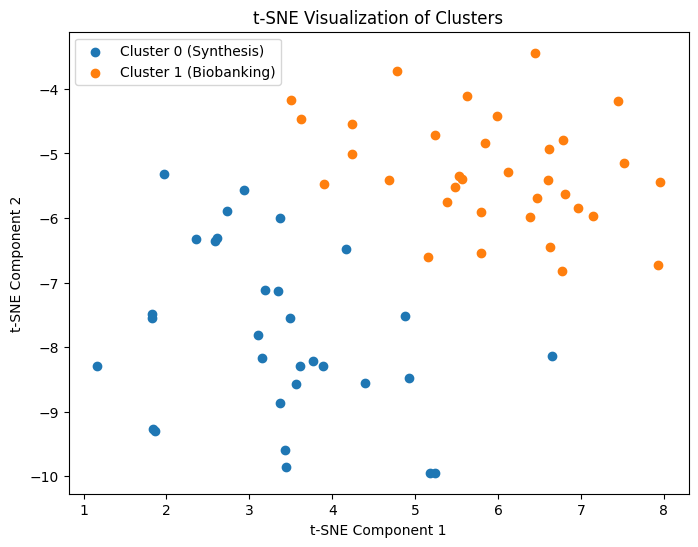

In [9]:
plt.figure(figsize=(8, 6))
for cluster_label in range(num_clusters):
    cluster_indices = df[df['cluster'] == cluster_label].index
    plt.scatter(X_tsne[cluster_indices, 0], X_tsne[cluster_indices, 1], label=f'Cluster {cluster_label} ({cluster_labels[cluster_label]})')

plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

Perform UMAP for visualization

In [10]:
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X)

C:\Users\its20\AppData\Local\Programs\Python\Python39\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Visualize clusters with UMAP

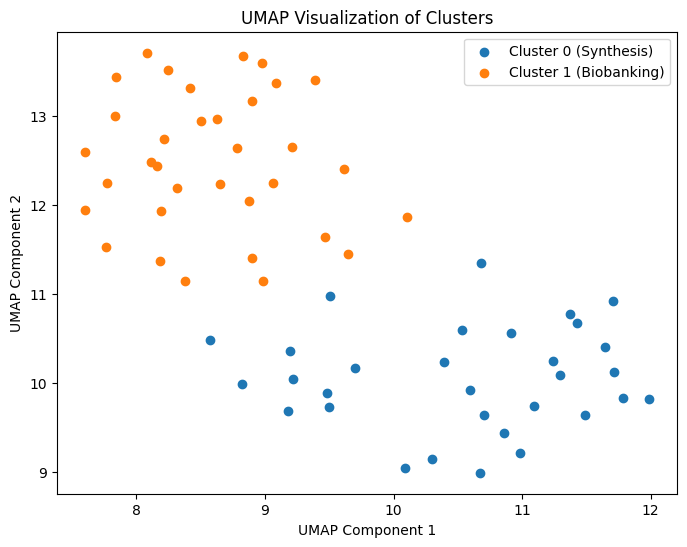

In [11]:
plt.figure(figsize=(8, 6))
for cluster_label in range(num_clusters):
    cluster_indices = df[df['cluster'] == cluster_label].index
    plt.scatter(X_umap[cluster_indices, 0], X_umap[cluster_indices, 1], label=f'Cluster {cluster_label} ({cluster_labels[cluster_label]})')

plt.title('UMAP Visualization of Clusters')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend()
plt.show()

Print two articles from each cluster

In [12]:
for cluster_label in range(num_clusters):
    cluster_indices = df[df['cluster'] == cluster_label].index[:2]  # Get indices of two articles from each cluster
    article_ids = df.loc[cluster_indices, 'Article-ID'].tolist()
    print(f"Cluster {cluster_label} ({cluster_labels[cluster_label]}): {article_ids}")

Cluster 0 (Synthesis): ['Erdmann, A., Rehmann-Sutter, C., & Bozzaro, C. (2021). Patients� and professionals� views related to ethical issues in precision medicine: a mixed research synthesis. BMC Medical Ethics, 22(1), 116. https://doi.org/10.1186/s12910-021-00682-8 ', 'Torab-Miandoab, A., Samad-Soltani, T., Jodati, A., & Rezaei-Hachesu, P. (2023). Interoperability of heterogeneous health information systems: a systematic literature review.�BMC Medical Informatics and Decision Making,�23(1), 2-13. https://doi.org/10.1186/s12911-023-02115-5']
Cluster 1 (Biobanking): ['Fiocchi, C., & Iliopoulos, D. (2021). IBD Systems Biology Is Here to Stay. Inflamm Bowel Dis, 27(6), 760-770. https://doi.org/10.1093/ibd/izaa343 ', 'Willers, C., Lynch, T., Chand, V., Islam, M., Lassere, M., & March, L. (2022). A Versatile, Secure, and Sustainable All-in-One Biobank-Registry Data Solution: The A3BC REDCap Model. Biopreserv Biobank, 20(3), 244-259. https://doi.org/10.1089/bio.2021.0098 ']
